# Data Preprocessing

In [2]:
# Enable Intellisense
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
from matplotlib import pyplot, dates
import plotly.express as px 
import datetime
import plotly.graph_objects as go
import plotly.io as pio
sns.set()

# Annoying warning
pd.options.mode.chained_assignment = None  # default='warn'

# Gen Data
## All Confirm

In [3]:
# confirm_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_confirmed.csv"

# confirm_data_req = requests.get(confirm_data_url).content

# confirmed_all_data = pd.read_csv(io.StringIO(confirm_data_req.decode('utf-8')), delimiter = ',', 
#                                  usecols=['date','province','age','gender','type'])
# confirmed_all_data.tail()
# del confirmed_all_data

**No longer going to use above data**

# Over time

## Provinces
Taken from 'covid19za_provincial_cumulative_timeline_confirmed.csv'
### Cumulative

In [4]:
province_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv"

province_data_req = requests.get(province_data_url).content

province_data = pd.read_csv(io.StringIO(province_data_req.decode('utf-8')), delimiter = ',')
province_data.drop(['YYYYMMDD'], axis = 1, inplace=True)
province_data.tail()

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
42,18-04-2020,270.0,100.0,1101.0,604.0,26.0,25.0,16.0,24.0,836.0,32.0,3034,NaN
43,19-04-2020,293.0,100.0,1148.0,617.0,27.0,23.0,16.0,24.0,868.0,42.0,3158,NaN
44,20-04-2020,310.0,105.0,1170.0,639.0,27.0,23.0,18.0,25.0,940.0,43.0,3300,https://twitter.com/DrZweliMkhize/status/12523...
45,21-04-2020,345.0,106.0,1199.0,671.0,27.0,24.0,16.0,24.0,1010.0,43.0,3465,https://twitter.com/DrZweliMkhize/status/12526...
46,22-04-2020,377.0,106.0,1224.0,758.0,27.0,23.0,16.0,24.0,1079.0,1.0,3635,https://sacoronavirus.co.za/2020/04/22/update-...


In [5]:
province_data.drop(['total','source'],axis=1, inplace = True)
province_data.dropna(inplace=True)
province_data.tail()

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN
42,18-04-2020,270.0,100.0,1101.0,604.0,26.0,25.0,16.0,24.0,836.0,32.0
43,19-04-2020,293.0,100.0,1148.0,617.0,27.0,23.0,16.0,24.0,868.0,42.0
44,20-04-2020,310.0,105.0,1170.0,639.0,27.0,23.0,18.0,25.0,940.0,43.0
45,21-04-2020,345.0,106.0,1199.0,671.0,27.0,24.0,16.0,24.0,1010.0,43.0
46,22-04-2020,377.0,106.0,1224.0,758.0,27.0,23.0,16.0,24.0,1079.0,1.0


In [6]:
province_data.to_csv('data/daily_prov.csv', index = False)

In [7]:
province_data = pd.read_csv('data/daily_prov.csv')
province_data.tail()

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN
40,18-04-2020,270.0,100.0,1101.0,604.0,26.0,25.0,16.0,24.0,836.0,32.0
41,19-04-2020,293.0,100.0,1148.0,617.0,27.0,23.0,16.0,24.0,868.0,42.0
42,20-04-2020,310.0,105.0,1170.0,639.0,27.0,23.0,18.0,25.0,940.0,43.0
43,21-04-2020,345.0,106.0,1199.0,671.0,27.0,24.0,16.0,24.0,1010.0,43.0
44,22-04-2020,377.0,106.0,1224.0,758.0,27.0,23.0,16.0,24.0,1079.0,1.0


In [8]:
province_data['date'] = pd.to_datetime(province_data['date'], format='%d-%m-%Y')

In [9]:
province_data_melt = province_data.melt(id_vars=['date'], var_name='province', value_name='cumulative_cases')
province_data_melt

,date,province,cumulative_cases
0,2020-03-05,EC,0.0
1,2020-03-07,EC,0.0
2,2020-03-08,EC,0.0
3,2020-03-09,EC,0.0
4,2020-03-11,EC,0.0
...,...,...,...
445,2020-04-18,UNKNOWN,32.0
446,2020-04-19,UNKNOWN,42.0
447,2020-04-20,UNKNOWN,43.0
448,2020-04-21,UNKNOWN,43.0


In [10]:
province_names = {
#     "EC":"Eastern Cape",
#     "FS" : "Free State",
#     "GP" : "Gauteng",
#     "KZN" : "KwaZula-Natal",
#     "LP" : "Limpopo",
#     "MP" : "Mpumalanga",
#     "NW" : "North West",
#     "NC" : "Northern Cape",
#     "WC" : "Western Cape",
    "UNKNOWN": "UNK"
}
# province_data_melt['province'] = province_data_melt['province'].map(province_names)
province_data_melt['province'] = province_data_melt['province'].replace("UNKNOWN","UNK")
province_data_melt

,date,province,cumulative_cases
0,2020-03-05,EC,0.0
1,2020-03-07,EC,0.0
2,2020-03-08,EC,0.0
3,2020-03-09,EC,0.0
4,2020-03-11,EC,0.0
...,...,...,...
445,2020-04-18,UNK,32.0
446,2020-04-19,UNK,42.0
447,2020-04-20,UNK,43.0
448,2020-04-21,UNK,43.0


### Daily

In [11]:
province_data_daily = province_data.copy()
province_data_daily.iloc[1:,1:] = province_data_daily.iloc[:,1:].diff().iloc[1:,:]
province_data_daily.tail()
# province_data_daily

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN
40,2020-04-18,24.0,0.0,83.0,13.0,0.0,2.0,0.0,0.0,119.0,10.0
41,2020-04-19,23.0,0.0,47.0,13.0,1.0,-2.0,0.0,0.0,32.0,10.0
42,2020-04-20,17.0,5.0,22.0,22.0,0.0,0.0,2.0,1.0,72.0,1.0
43,2020-04-21,35.0,1.0,29.0,32.0,0.0,1.0,-2.0,-1.0,70.0,0.0
44,2020-04-22,32.0,0.0,25.0,87.0,0.0,-1.0,0.0,0.0,69.0,-42.0


In [12]:
province_data_daily_melt = province_data_daily.melt(id_vars=['date'], var_name='province', 
                                                    value_name='daily_cases')
province_data_daily_melt.tail()

,date,province,daily_cases
445,2020-04-18,UNKNOWN,10.0
446,2020-04-19,UNKNOWN,10.0
447,2020-04-20,UNKNOWN,1.0
448,2020-04-21,UNKNOWN,0.0
449,2020-04-22,UNKNOWN,-42.0


In [13]:
province_names = {
#     "EC":"Eastern Cape",
#     "FS" : "Free State",
#     "GP" : "Gauteng",
#     "KZN" : "KwaZula-Natal",
#     "LP" : "Limpopo",
#     "MP" : "Mpumalanga",
#     "NW" : "North West",
#     "NC" : "Northern Cape",
#     "WC" : "Western Cape",
    "UNKNOWN": "UNK"
}
# province_data_daily_melt['province'] = province_data_daily_melt['province'].map(province_names)
province_data_daily_melt['province'] = province_data_daily_melt['province'].replace("UNKNOWN","UNK")
province_data_daily_melt

,date,province,daily_cases
0,2020-03-05,EC,0.0
1,2020-03-07,EC,0.0
2,2020-03-08,EC,0.0
3,2020-03-09,EC,0.0
4,2020-03-11,EC,0.0
...,...,...,...
445,2020-04-18,UNK,10.0
446,2020-04-19,UNK,10.0
447,2020-04-20,UNK,1.0
448,2020-04-21,UNK,0.0


### Concatenate Cumulative & Daily

In [14]:
prov_cumulative_daily = pd.concat([province_data_melt, province_data_daily_melt['daily_cases']], axis =1)
prov_cumulative_daily.tail()

,date,province,cumulative_cases,daily_cases
445,2020-04-18,UNK,32.0,10.0
446,2020-04-19,UNK,42.0,10.0
447,2020-04-20,UNK,43.0,1.0
448,2020-04-21,UNK,43.0,0.0
449,2020-04-22,UNK,1.0,-42.0


**Save to csv**

In [15]:
prov_cumulative_daily.to_csv('data/daily_cumulative_confirmed_prov.csv', index=False)

## Tests

In [16]:
tests_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_testing.csv"

tests_data_req = requests.get(tests_data_url).content

tests_data = pd.read_csv(io.StringIO(tests_data_req.decode('utf-8')), delimiter = ',',
                         usecols=['date','cumulative_tests'])
tests_data.dropna(inplace=True)

So far tests_data only includes cumulative.

In [17]:
tests_data

,date,cumulative_tests
0,11-02-2020,61.0
1,13-02-2020,67.0
2,14-02-2020,71.0
3,19-02-2020,95.0
4,20-02-2020,106.0
5,24-02-2020,116.0
6,26-02-2020,121.0
7,02-03-2020,160.0
8,03-03-2020,164.0
9,06-03-2020,200.0


In [18]:
tests_data.to_csv('data/tests_data.csv', index=False)

### Daily

In [19]:
tests_data['daily_tests'] = tests_data['cumulative_tests']
# slice is required as first entry of diff will be NaN but data we want should be equal to the starting value
tests_data['daily_tests'][1:] = tests_data['cumulative_tests'].diff()[1:] 
tests_data

,date,cumulative_tests,daily_tests
0,11-02-2020,61.0,61.0
1,13-02-2020,67.0,6.0
2,14-02-2020,71.0,4.0
3,19-02-2020,95.0,24.0
4,20-02-2020,106.0,11.0
5,24-02-2020,116.0,10.0
6,26-02-2020,121.0,5.0
7,02-03-2020,160.0,39.0
8,03-03-2020,164.0,4.0
9,06-03-2020,200.0,36.0


#### Save to CSV

In [20]:
tests_data.to_csv('data/daily_cumulative_tests.csv', index=False)

## Confirmed Cases
Get no of cumulative cases from 'covid19za_provincial_cumulative_timeline_confirmed.csv'
### Cumulative

In [21]:
confirmed_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv"

confirmed_data_req = requests.get(confirmed_data_url).content

confirmed_data = pd.read_csv(io.StringIO(confirmed_data_req.decode('utf-8')), usecols=['date','total'])

confirmed_data.tail()

,date,total
42,18-04-2020,3034
43,19-04-2020,3158
44,20-04-2020,3300
45,21-04-2020,3465
46,22-04-2020,3635


In [22]:
confirmed_data['date'] = pd.to_datetime(confirmed_data['date'], format='%d-%m-%Y')
confirmed_data.set_index('date', inplace=True)
confirmed_data.rename(columns={"total":"cumulative_cases"}, inplace = True)
confirmed_data

,cumulative_cases
date,
2020-03-05,1
2020-03-07,2
2020-03-08,3
2020-03-09,7
2020-03-11,13
2020-03-12,16
2020-03-13,24
2020-03-14,38
2020-03-15,51


### Daily

In [23]:
confirmed_data['daily_cases'] = confirmed_data['cumulative_cases']
# slice is required as first entry of diff will be NaN but data we want should be equal to the starting value
confirmed_data['daily_cases'][1:] = confirmed_data['cumulative_cases'].diff()[1:] 
confirmed_data

,cumulative_cases,daily_cases
date,,
2020-03-05,1,1.0
2020-03-07,2,1.0
2020-03-08,3,1.0
2020-03-09,7,4.0
2020-03-11,13,6.0
2020-03-12,16,3.0
2020-03-13,24,8.0
2020-03-14,38,14.0
2020-03-15,51,13.0


**Save to csv**

In [24]:
confirmed_data.to_csv('data/daily_cumulative_confirmed.csv')

### Daily

In [25]:
# confirmed_data = confirmed_all_data.groupby(['date']).count()[['province']]
# confirmed_data.rename(columns={'province':'daily_cases'}, inplace = True)
# confirmed_data

### Cumulative

In [26]:
# confirmed_data['cumulative_cases'] = confirmed_data['daily_cases'].cumsum()
# confirmed_data

**Save to csv**

Above method is no longer being used. Thus why below is commented out.

In [27]:
# confirmed_data.to_csv('data/daily_cumulative_confirmed.csv')

**Use saved data rather than above**

In [28]:
# confirmed_data = pd.read_csv('data/daily_cumulative_confirmed.csv')
# confirmed_data['date'] = pd.to_datetime(confirmed_data['date'], format='%Y-%m-%d')
# confirmed_data.set_index('date', inplace=True)
# confirmed_data

**Add data to above**

Data to be added:

In [29]:
# # Format must be dd-mm-YYYY
# date_str = "29-03-2020"
# date_dt = pd.to_datetime(date_str, format='%d-%m-%Y')
# new_tot_cases = 1326

In [30]:
# new_daily_cases = new_tot_cases - confirmed_data.iloc[-1]['cumulative_cases']
# new_df_entry = pd.DataFrame({"date":[date_dt],
#              "daily_cases":[new_daily_cases],
#              "cumulative_cases":[new_tot_cases]}).set_index('date')
# confirmed_data = pd.concat([confirmed_data, new_df_entry])
# confirmed_data.tail()

**Save to csv**

In [31]:
# confirmed_data.to_csv('data/daily_cumulative_confirmed.csv')

## Confirmed & Tests
### Daily

In [32]:
confirmed_data_tmp = confirmed_data.reset_index()
confirmed_data_tmp['date'] = pd.to_datetime(confirmed_data_tmp['date'], format='%d-%m-%Y')
confirmed_data_tmp.set_index('date', inplace = True)
confirmed_data_tmp.tail()

,cumulative_cases,daily_cases
date,,
2020-04-18,3034,251.0
2020-04-19,3158,124.0
2020-04-20,3300,142.0
2020-04-21,3465,165.0
2020-04-22,3635,170.0


In [33]:
tests_data_tmp = tests_data.copy()
# test_data_tmp.info()
tests_data_tmp['date'] = pd.to_datetime(tests_data_tmp['date'], format='%d-%m-%Y')
tests_data_tmp.set_index('date', inplace = True)
tests_data_tmp.tail()

,cumulative_tests,daily_tests
date,,
2020-04-18,108201.0,7374.0
2020-04-19,114711.0,6510.0
2020-04-20,121510.0,6799.0
2020-04-21,126937.0,5427.0
2020-04-22,133774.0,6837.0


In [34]:
daily_tests_confirmed = pd.concat([confirmed_data_tmp[['daily_cases']], 
                                   tests_data_tmp['daily_tests']], axis = 1, sort = True)
daily_tests_confirmed['daily_cases'].fillna(0,inplace=True)
daily_tests_confirmed

,daily_cases,daily_tests
date,,
2020-02-11,0.0,61.0
2020-02-13,0.0,6.0
2020-02-14,0.0,4.0
2020-02-19,0.0,24.0
2020-02-20,0.0,11.0
2020-02-24,0.0,10.0
2020-02-26,0.0,5.0
2020-03-02,0.0,39.0
2020-03-03,0.0,4.0


NaN for daily_tests corresponds to test data not available.
### Percentage of Positive Tests

In [35]:
daily_tests_confirmed['perc_positive'] = (daily_tests_confirmed['daily_cases']/
                                          daily_tests_confirmed['daily_tests']) * 100
daily_tests_confirmed['perc_positive'] = daily_tests_confirmed['perc_positive'].round(1)
daily_tests_confirmed

,daily_cases,daily_tests,perc_positive
date,,,
2020-02-11,0.0,61.0,0.0
2020-02-13,0.0,6.0,0.0
2020-02-14,0.0,4.0,0.0
2020-02-19,0.0,24.0,0.0
2020-02-20,0.0,11.0,0.0
2020-02-24,0.0,10.0,0.0
2020-02-26,0.0,5.0,0.0
2020-03-02,0.0,39.0,0.0
2020-03-03,0.0,4.0,0.0


**Save to csv**

In [36]:
daily_tests_confirmed.to_csv('data/daily_tests_confirmed.csv')

### Cumulative

In [37]:
cumulative_tests_confirmed = daily_tests_confirmed.cumsum()
cumulative_tests_confirmed

,daily_cases,daily_tests,perc_positive
date,,,
2020-02-11,0.0,61.0,0.0
2020-02-13,0.0,67.0,0.0
2020-02-14,0.0,71.0,0.0
2020-02-19,0.0,95.0,0.0
2020-02-20,0.0,106.0,0.0
2020-02-24,0.0,116.0,0.0
2020-02-26,0.0,121.0,0.0
2020-03-02,0.0,160.0,0.0
2020-03-03,0.0,164.0,0.0


// TODO - Rename to Cumulative as this is confusing

### Percentage of Positive Tests

In [38]:
cumulative_tests_confirmed['perc_positive'] = (cumulative_tests_confirmed['daily_cases']/
                                          cumulative_tests_confirmed['daily_tests']) * 100
cumulative_tests_confirmed['perc_positive'] = cumulative_tests_confirmed['perc_positive'].round(1)
cumulative_tests_confirmed

,daily_cases,daily_tests,perc_positive
date,,,
2020-02-11,0.0,61.0,0.0
2020-02-13,0.0,67.0,0.0
2020-02-14,0.0,71.0,0.0
2020-02-19,0.0,95.0,0.0
2020-02-20,0.0,106.0,0.0
2020-02-24,0.0,116.0,0.0
2020-02-26,0.0,121.0,0.0
2020-03-02,0.0,160.0,0.0
2020-03-03,0.0,164.0,0.0


**Save to csv**

In [39]:
cumulative_tests_confirmed.to_csv('data/cumulative_tests_confirmed.csv')

# Deaths & Recoveries
## Recoveries

In [40]:
recovered_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_testing.csv"
recovered_data_req = requests.get(recovered_data_url).content

recovered_data = pd.read_csv(io.StringIO(recovered_data_req.decode('utf-8')), delimiter = ',', 
                            usecols=['date','recovered'])
# rename recovered
recovered_data.rename(columns={"recovered":"cum_recovered"}, inplace=True)

# drop fields where recovered is 0
recovered_data.drop(recovered_data[recovered_data['cum_recovered']==0]['cum_recovered'].index, inplace=True)
recovered_data

,date,cum_recovered
22,22-03-2020,1
23,23-03-2020,1
24,24-03-2020,2
25,25-03-2020,4
26,26-03-2020,4
27,27-03-2020,31
28,28-03-2020,31
29,29-03-2020,31
30,30-03-2020,31
31,31-03-2020,31


In [41]:
recovered_data['date'] = pd.to_datetime(recovered_data['date'], format='%d-%m-%Y')
recovered_data.set_index('date', inplace = True)
recovered_data

,cum_recovered
date,
2020-03-22,1
2020-03-23,1
2020-03-24,2
2020-03-25,4
2020-03-26,4
2020-03-27,31
2020-03-28,31
2020-03-29,31
2020-03-30,31


In [42]:
recovered_data['daily_recovered'] = recovered_data['cum_recovered']
# slice is required as first entry of diff will be NaN but data we want should be equal to the starting value
recovered_data['daily_recovered'][1:] = recovered_data['cum_recovered'].diff()[1:] 
recovered_data

,cum_recovered,daily_recovered
date,,
2020-03-22,1,1.0
2020-03-23,1,0.0
2020-03-24,2,1.0
2020-03-25,4,2.0
2020-03-26,4,0.0
2020-03-27,31,27.0
2020-03-28,31,0.0
2020-03-29,31,0.0
2020-03-30,31,0.0


**Save to csv**

In [43]:
recovered_data.to_csv('data/recovered_data.csv')

## Deaths
From https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_deaths.csv

**Outdated**

In [44]:
deaths_data_prov_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_deaths.csv"
deaths_data_prov_req = requests.get(deaths_data_prov_url).content

deaths_prov_data = pd.read_csv(io.StringIO(deaths_data_prov_req.decode('utf-8'))).drop("YYYYMMDD", axis =1)

deaths_prov_data

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,08-04-2020,0,3,3,9,0,0,0,0,3,0,18
1,09-04-2020,0,3,3,9,0,0,0,0,3,0,18
2,10-04-2020,0,3,3,12,0,0,0,0,6,0,24
3,11-04-2020,0,3,3,12,0,0,0,0,6,0,25


In [45]:
deaths_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_deaths.csv"
deaths_data_req = requests.get(deaths_data_url).content

deaths_data = pd.read_csv(io.StringIO(deaths_data_req.decode('utf-8')), delimiter = ',',
                            usecols=['date', 'province', ' gender', ' age'])
deaths_data.rename(columns={" gender":"gender", " age":"age"}, inplace=True)

deaths_data_copy = deaths_data.copy()
deaths_data

,date,province,gender,age
0,27-03-2020,WC,female,48.0
1,28-03-2020,KZN,male,74.0
2,30-03-2020,FS,male,85.0
3,31-03-2020,GP,male,79.0
4,31-03-2020,KZN,female,46.0
...,...,...,...,...
60,22-04-2020,WC,male,79.0
61,22-04-2020,WC,female,54.0
62,22-04-2020,WC,female,95.0
63,22-04-2020,KZN,NaN,NaN


In [46]:
deaths_data['date'] = pd.to_datetime(deaths_data['date'], format='%d-%m-%Y')
deaths_data

,date,province,gender,age
0,2020-03-27,WC,female,48.0
1,2020-03-28,KZN,male,74.0
2,2020-03-30,FS,male,85.0
3,2020-03-31,GP,male,79.0
4,2020-03-31,KZN,female,46.0
...,...,...,...,...
60,2020-04-22,WC,male,79.0
61,2020-04-22,WC,female,54.0
62,2020-04-22,WC,female,95.0
63,2020-04-22,KZN,NaN,NaN


In [47]:
deaths_data['province'].fillna("UNKOWN", inplace = True)
deaths_data

,date,province,gender,age
0,2020-03-27,WC,female,48.0
1,2020-03-28,KZN,male,74.0
2,2020-03-30,FS,male,85.0
3,2020-03-31,GP,male,79.0
4,2020-03-31,KZN,female,46.0
...,...,...,...,...
60,2020-04-22,WC,male,79.0
61,2020-04-22,WC,female,54.0
62,2020-04-22,WC,female,95.0
63,2020-04-22,KZN,NaN,NaN


### Total per day
#### Daily

In [48]:
deaths_data_per_day = deaths_data.groupby('date')[['province']].count()
deaths_data_per_day.rename(columns={"province":"daily_deaths"},inplace=True)
deaths_data_per_day

,daily_deaths
date,
2020-03-27,1
2020-03-28,1
2020-03-30,1
2020-03-31,2
2020-04-03,4
2020-04-05,2
2020-04-06,1
2020-04-07,1
2020-04-08,5


Manually add entry

#### Cumulative

In [49]:
deaths_data_per_day['cum_deaths']=deaths_data_per_day['daily_deaths'].cumsum()
deaths_data_per_day

,daily_deaths,cum_deaths
date,,
2020-03-27,1,1
2020-03-28,1,2
2020-03-30,1,3
2020-03-31,2,5
2020-04-03,4,9
2020-04-05,2,11
2020-04-06,1,12
2020-04-07,1,13
2020-04-08,5,18


In [50]:
def add_deaths(org_df, date_of_deaths, cumulative_deaths):
    date_dt = pd.to_datetime(date_of_deaths, format='%d-%m-%Y') # Format must be dd-mm-YYYY
    new_tot_deaths = cumulative_deaths

    new_daily_deaths = new_tot_deaths - org_df.iloc[-1]['cum_deaths']
    new_df_entry = pd.DataFrame({"date":[date_dt], 
                             "daily_deaths":[new_daily_deaths],
                             "cum_deaths":[new_tot_deaths],}).set_index('date')
    new_df = pd.concat([org_df, new_df_entry])
    return new_df

In [51]:
# deaths_data_per_day = add_deaths(deaths_data_per_day, "17-04-2020", 50) # 17th April - 50 deaths
# deaths_data_per_day = add_deaths(deaths_data_per_day, "18-04-2020", 52) # 18th April - 52 deaths
# deaths_data_per_day = add_deaths(deaths_data_per_day, "19-04-2020", 54) # 19th April - 54 deaths
# deaths_data_per_day

**Save to csv**

In [52]:
deaths_data_per_day.to_csv('data/daily_cum_deaths.csv')

#### Deaths Vs Recovered

In [53]:
deaths_vs_recoveries = pd.concat([deaths_data_per_day[['cum_deaths']], recovered_data['cum_recovered']], 
                                 axis =1)
deaths_vs_recoveries.iloc[0,0] = 0
deaths_vs_recoveries['cum_deaths'].ffill(inplace=True)
deaths_vs_recoveries['cum_recovered'].ffill(inplace=True)
deaths_vs_recoveries

,cum_deaths,cum_recovered
date,,
2020-03-22,0.0,1
2020-03-23,0.0,1
2020-03-24,0.0,2
2020-03-25,0.0,4
2020-03-26,0.0,4
2020-03-27,1.0,31
2020-03-28,2.0,31
2020-03-29,2.0,31
2020-03-30,3.0,31


**Save to csv**

In [54]:
deaths_vs_recoveries.to_csv('data/deaths_vs_recoveries.csv')

# Totals
## Province
### Confirmed Cases

In [55]:
province_names = {
    "EC":"Eastern Cape",
    "FS" : "Free State",
    "GP" : "Gauteng",
    "KZN" : "KwaZula-Natal",
    "LP" : "Limpopo",
    "MP" : "Mpumalanga",
    "NW" : "North West",
    "NC" : "Northern Cape",
    "WC" : "Western Cape",
    "UNKNOWN": "Unknown"
}

In [56]:
prov_totals = province_data.tail(1).copy()
prov_totals = prov_totals.melt(id_vars=['date'], var_name='province', value_name='total')
prov_totals['province'] = prov_totals['province'].map(province_names)
prov_totals.drop('date',axis=1,inplace=True)
prov_totals

,province,total
0,Eastern Cape,377.0
1,Free State,106.0
2,Gauteng,1224.0
3,KwaZula-Natal,758.0
4,Limpopo,27.0
5,Mpumalanga,23.0
6,Northern Cape,16.0
7,North West,24.0
8,Western Cape,1079.0
9,Unknown,1.0


**Save to csv**

In [57]:
prov_totals.to_csv('data/tot_provinces.csv',index=False)

### Deaths

In [58]:
prov_deaths_totals = deaths_prov_data.tail(1).copy().drop(['total'], axis =1)
prov_deaths_totals = prov_deaths_totals.melt(id_vars=['date'], var_name='province', value_name='total')
prov_deaths_totals['province'] = prov_deaths_totals['province'].map(province_names)
prov_deaths_totals

,date,province,total
0,11-04-2020,Eastern Cape,0
1,11-04-2020,Free State,3
2,11-04-2020,Gauteng,3
3,11-04-2020,KwaZula-Natal,12
4,11-04-2020,Limpopo,0
5,11-04-2020,Mpumalanga,0
6,11-04-2020,Northern Cape,0
7,11-04-2020,North West,0
8,11-04-2020,Western Cape,6
9,11-04-2020,Unknown,0


**Save to csv**

In [59]:
#prov_deaths_totals.to_csv('data/tot_deaths_provinces.csv',index=False)

## Deaths - Additional

In [60]:
deaths_data_copy.drop(['gender','age'], axis =1, inplace=True)
deaths_data_copy.dropna(inplace=True)
deaths_data_copy

,date,province
0,27-03-2020,WC
1,28-03-2020,KZN
2,30-03-2020,FS
3,31-03-2020,GP
4,31-03-2020,KZN
...,...,...
60,22-04-2020,WC
61,22-04-2020,WC
62,22-04-2020,WC
63,22-04-2020,KZN


## Data to be displayed as text on website

In [61]:
format(200003,',d').replace(","," ")

'200 003'

In [62]:
def zero_space(num):
    return format(num,',d').replace(","," ")

In [63]:
tot_tested = zero_space(tests_data.tail(1).iloc[0]['cumulative_tests'].astype(int))
change_tested = zero_space(tests_data.tail(1).iloc[0]['daily_tests'].astype(int))
print(tot_tested, change_tested)

133 774 6 837


In [64]:
tot_infected = zero_space(confirmed_data.tail(1).iloc[0]['cumulative_cases'].astype(int))
change_infected = zero_space(confirmed_data.tail(1).iloc[0]['daily_cases'].astype(int))
print(tot_infected, change_infected)

3 635 170


In [65]:
tot_deaths = zero_space(deaths_vs_recoveries.tail(1).iloc[0]['cum_deaths'].astype(int))
change_deaths = zero_space(deaths_vs_recoveries['cum_deaths'].diff().tail(1).iloc[0].astype(int))
print(tot_deaths, change_deaths)

65 7


In [66]:
tot_recoveries = zero_space(deaths_vs_recoveries.tail(1).iloc[0]['cum_recovered'].astype(int))
change_recoveries = zero_space(deaths_vs_recoveries['cum_recovered'].diff().tail(1).iloc[0].astype(int))
print(tot_recoveries, change_recoveries)

1 055 0


In [67]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M %d %B %Y")
print("Current Time =", current_time)

Current Time = 10:58 23 April 2020


In [68]:
gen_data = pd.DataFrame(dict(tot_infected=[tot_infected], change_infected=[change_infected], 
                             tot_deaths=[tot_deaths], change_deaths=[change_deaths],
                             tot_tested=[tot_tested], change_tested=[change_tested], 
                             tot_recoveries=[tot_recoveries], change_recoveries=[change_recoveries], 
                             datetime_updated=[current_time]))
gen_data

,tot_infected,change_infected,tot_deaths,change_deaths,tot_tested,change_tested,tot_recoveries,change_recoveries,datetime_updated
0,3 635,170,65,7,133 774,6 837,1 055,0,10:58 23 April 2020


In [83]:
gen_data.to_csv("data/gen_data.csv", index=False)

# Data from Image
Use data_from_img.py code to load data from NICD infographic image specified

In [70]:
import data_from_img

**Path of image to be processed:**

In [71]:
img_path = "NICD_updates/NICD_Updates_04_22.jpg"

**Get data from image**

In [72]:
date, prov_deaths_totals, prov_recovered_totals, gen_totals = data_from_img.get_tot_data(img_path)

Date done
prov_death_totals done
prov_recovered_totals done
gen_totals done


### Province Names Dict

In [73]:
province_names = {
    "EC":"Eastern Cape",
    "FS" : "Free State",
    "GP" : "Gauteng",
    "KZN" : "KwaZula-Natal",
    "LP" : "Limpopo",
    "MP" : "Mpumalanga",
    "NW" : "North West",
    "NC" : "Northern Cape",
    "WC" : "Western Cape",
    "UNKNOWN": "Unknown"
}

### Deaths

In [74]:
prov_deaths_totals_df = pd.DataFrame([prov_deaths_totals])
prov_deaths_totals_df['date'] = date
prov_deaths_totals_df =prov_deaths_totals_df.melt(id_vars=['date'], var_name='province', 
                                                  value_name='deaths').set_index(['date'])
prov_deaths_totals_df['province'] = prov_deaths_totals_df['province'].map(province_names)
prov_deaths_totals_df

,province,deaths
date,,
22-04-2020,Eastern Cape,5
22-04-2020,Free State,5
22-04-2020,Gauteng,
22-04-2020,KwaZula-Natal,25
22-04-2020,Limpopo,1
22-04-2020,Mpumalanga,0
22-04-2020,North West,0
22-04-2020,Northern Cape,0
22-04-2020,Western Cape,22


**Save to csv**

In [75]:
prov_deaths_totals_df.to_csv('data/tot_deaths_provinces.csv',index=True)

### Recovered

In [76]:
prov_recovered_totals_df = pd.DataFrame([prov_recovered_totals])
prov_recovered_totals_df['date'] = date
prov_recovered_totals_df =prov_recovered_totals_df.melt(id_vars=['date'], var_name='province', 
                                                  value_name='recovered').set_index(['date'])
prov_recovered_totals_df['province'] = prov_recovered_totals_df['province'].map(province_names)
prov_recovered_totals_df

,province,recovered
date,,
22-04-2020,Eastern Cape,15
22-04-2020,Free State,74
22-04-2020,Gauteng,545
22-04-2020,KwaZula-Natal,151
22-04-2020,Limpopo,21
22-04-2020,Mpumalanga,14
22-04-2020,North West,13
22-04-2020,Northern Cape,6
22-04-2020,Western Cape,216


**Save to csv**

In [77]:
prov_recovered_totals_df.to_csv('data/tot_recovered_provinces.csv',index=True)

# Test

In [ ]:
# %load data_from_img.py
from PIL import Image
import pytesseract
import cv2
from matplotlib import pyplot as plt
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Will most likely move these to a JSON file later on for ease of use
prov_death_coords = {
    'ec': [226, 78, 368, 31],
    'fs': [226, 78, 404, 31],
    'gp': [226, 78, 440, 31],
    'kzn': [226, 78, 474, 31],
    'lp': [226, 78, 510, 31],
    'mp': [226, 78, 549, 31],
    'nw': [226, 78, 587, 31],
    'nc': [226, 78, 625, 31],
    'wc': [226, 78, 665, 31]
}

prov_recovered_coords = {
    'ec': [308, 78, 368, 31],
    'fs': [308, 78, 404, 31],
    'gp': [308, 78, 440, 31],
    'kzn': [308, 78, 474, 31],
    'lp': [308, 78, 510, 31],
    'mp': [308, 78, 549, 31],
    'nw': [308, 78, 587, 31],
    'nc': [308, 78, 625, 31],
    'wc': [308, 78, 665, 31]
}

prov_confirmed_coords = dict(
    # Easier ways to get these but while I'm here...
    gp = [695, 93, 303, 28],
    kzn = [1120, 112, 547, 32],
    nw = [765, 65, 430, 31],
    lp = [918, 68, 312, 30],
    mp = [1112, 52, 383, 33],
    fs = [814, 58, 529, 28],
    wc = [585, 66, 744, 25],
    ec = [805, 79, 689, 29]
)

gen_tot_coords = dict(
    unknown = [190,100,134,32],
    confirmed = [280, 100, 170, 32],
    tests = [271, 121, 210, 32],
    deaths = [165, 100, 247, 32],
)

date_coords=[557, 210 , 116, 45]


def get_tot_data(img_path):
    img_cv = cv2.imread(img_path)
    orig_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    dimensions = (1280, 905)
    orig_img = cv2.resize(orig_img, dimensions)

    # pre-processing
    img_arr = np.array(orig_img)
    red, green, blue = img_arr.T
    threshold = 150
    white_areas = (red > threshold) & (blue > threshold) & (green > threshold)
    img_arr[..., :][white_areas.T] = (0, 0, 0)
    convert_img = np.where(img_arr == 0, 0, 255)
    convert_img = convert_img.astype(np.uint8)

    img = convert_img

    def get_sub_img(coords):
        sub_img = img[coords[2]:coords[2] + coords[3], coords[0]:coords[0] + coords[1]]
        return sub_img

    def preprocess_img(in_img):
        proc_img = in_img
        ret, prc_img = cv2.threshold(np.array(proc_img), 125, 255, cv2.THRESH_BINARY)
        proc_img = cv2.blur(proc_img, (2, 2))
        return proc_img

    def no_from_img(coords, preprocess=False, show_img=False):
        # sub_proc_img = preprocess_img(getSubImg(dict_key))
        sub_proc_img = get_sub_img(coords)
        if (preprocess):
            sub_proc_img = preprocess_img(sub_proc_img)
        if (show_img):
            plt.imshow(sub_proc_img)
            plt.show()
        return pytesseract.image_to_string(sub_proc_img, config='--psm 7 digits')

    date = no_from_img(date_coords)

    print("Date done")
    prov_deaths_totals = dict()
    prov_recovered_totals = dict()
    prov_confirmed_totals = dict()

    for coords in prov_death_coords:
        amount = no_from_img(prov_death_coords[coords], True)
        prov_deaths_totals[coords.upper()] = amount

    print("prov_death_totals done")

    for coords in prov_recovered_coords:
        amount = no_from_img(prov_recovered_coords[coords], True)
        prov_recovered_totals[coords.upper()] = amount

    print("prov_recovered_totals done")

    # for coords in prov_confirmed_coords:
    #     amount = no_from_img(prov_confirmed_coords[coords], True)
    #     prov_confirmed_totals[coords.upper()] = amount
    #     print(coords.upper() + " done")

    # print("")
    #
    # print("prov_confirmed_totals done")

    gen_totals = dict(
        unknown=no_from_img(gen_tot_coords['unknown']),
        confirmed=no_from_img(gen_tot_coords['confirmed']),
        tests=no_from_img(gen_tot_coords['tests']),
        deaths=no_from_img(gen_tot_coords['deaths']),

    )

    print("gen_totals done")

    return date, prov_deaths_totals, prov_recovered_totals, gen_totals

# prov_confirmed_totals

# img_path = "NICD_updates/NICD_Updates_04_21.jpg"
# date, prov_deaths_totals, prov_recovered_totals, prov_confirmed_totals, gen_totals = get_tot_data(img_path)
# print("Image Path: " + img_path)
# print("Date: " + date)
# print("Deaths:", prov_deaths_totals)
# print("Recovered: ", prov_recovered_totals)
# print("Confirmed: ", prov_confirmed_totals)
# print("General: ", gen_totals)


Date done


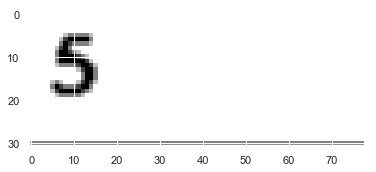

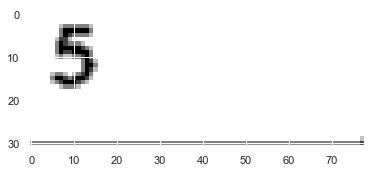

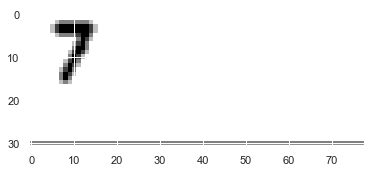

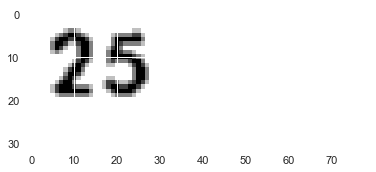

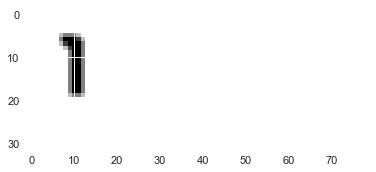

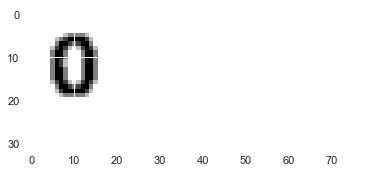

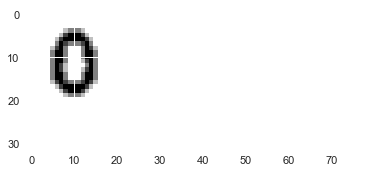

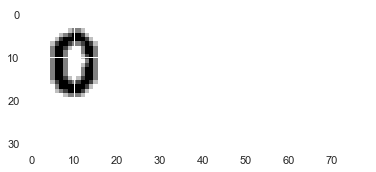

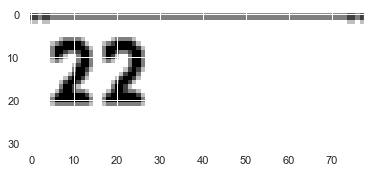

prov_death_totals done
prov_recovered_totals done
gen_totals done


In [82]:
date, prov_deaths_totals, prov_recovered_totals, gen_totals = get_tot_data(img_path)